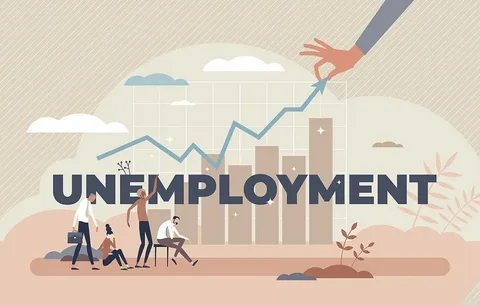

Before diving into the visual representations and trends, it’s important to reflect on what the data truly represents. Unemployment is not merely a number, it’s a mirror of the economic health of a region, a signal of workforce dynamics, and often, a reflection of broader societal shifts.

In India, the unemployment rate captures the percentage of people actively seeking but unable to find work. This metric becomes especially significant during disruptive periods like the Covid-19 pandemic, where economic slowdowns, lockdowns, and labor displacement drastically shifted the employment landscape.

This section aims to go beyond numbers. Through visual analytics, we explore the monthly variations, regional disparities, and the devastating impact of Covid-19 on employment. These patterns help us not only understand past conditions but also draw insights to inform future economic and social policies.

In [8]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")
data_copy = data.copy()

data.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.74


In [5]:
data.shape

(267, 9)

Using "*.shape* " we can learn size of our  dataset (number of columns and rows)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [7]:
data.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


Alternatively, we can use "*.isna().sum()* ", there is no difference between them.

Eventually, **we don't have any NULL values**.

In [11]:
# rename columns

data.columns = ['State', 'Date', 'Frequency', 'Estimated Unemployment Rate',
              'Estimated Employed', 'Estimated Labour Participation Rate',
              'Region', 'Longitude', 'Latitude']

# converting
data['Date'] = pd.to_datetime(data['Date'].str.strip(), format = '%d-%m-%Y')

# extract year and month
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.strftime('%b')

* **Rename columns** to more readable names.
* **Convert "Date"** column from text to datetime format.
* **Extract year and month** from the date for easier time-based analysis.

In [12]:
 data.head(10)

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Longitude,Latitude,Year,Month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,2020,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2020,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,2020,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,2020,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,2020,May
5,Andhra Pradesh,2020-06-30,M,3.31,19805400,47.41,South,15.9129,79.74,2020,Jun
6,Andhra Pradesh,2020-07-31,M,8.34,15431615,38.91,South,15.9129,79.74,2020,Jul
7,Andhra Pradesh,2020-08-31,M,6.96,15251776,37.83,South,15.9129,79.74,2020,Aug
8,Andhra Pradesh,2020-09-30,M,6.40,15220312,37.47,South,15.9129,79.74,2020,Sep
9,Andhra Pradesh,2020-10-31,M,6.59,15157557,37.34,South,15.9129,79.74,2020,Oct


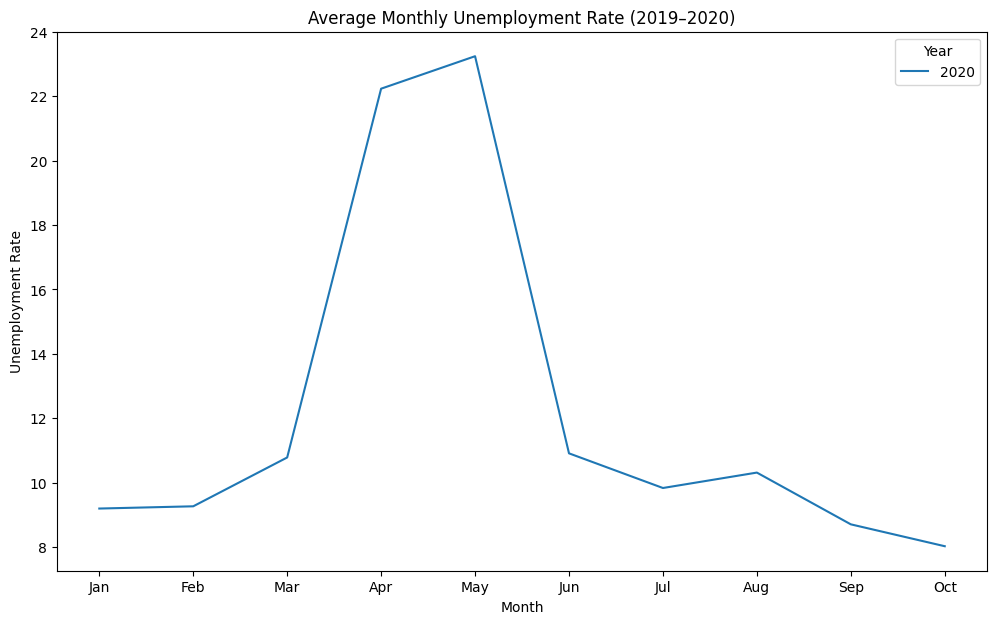

In [15]:
monthly_avg = data.groupby(['Year', 'Month'])['Estimated Unemployment Rate'].mean().reset_index()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg['Month'] = pd.Categorical(monthly_avg['Month'], categories = month_order, ordered = True)
monthly_avg.sort_values(['Year', 'Month'], inplace = True)

plt.figure(figsize=(12, 7))
sns.lineplot(data = monthly_avg, x = 'Month', y = 'Estimated Unemployment Rate', hue = 'Year', palette = 'tab10')
plt.title('Average Monthly Unemployment Rate (2019–2020)')
plt.ylabel('Unemployment Rate')
plt.show()

* **Group data** by year and month, then calculate the **average unemployment rate**.
* **Set proper month order** (Jan–Dec) for correct plotting.
* **Sort the data**, so months appear in logical order.
* **Plot a line chart** showing how unemployment changed **each month across years**.

---

As a result, we can see, rate is pretty high in *April and May*.

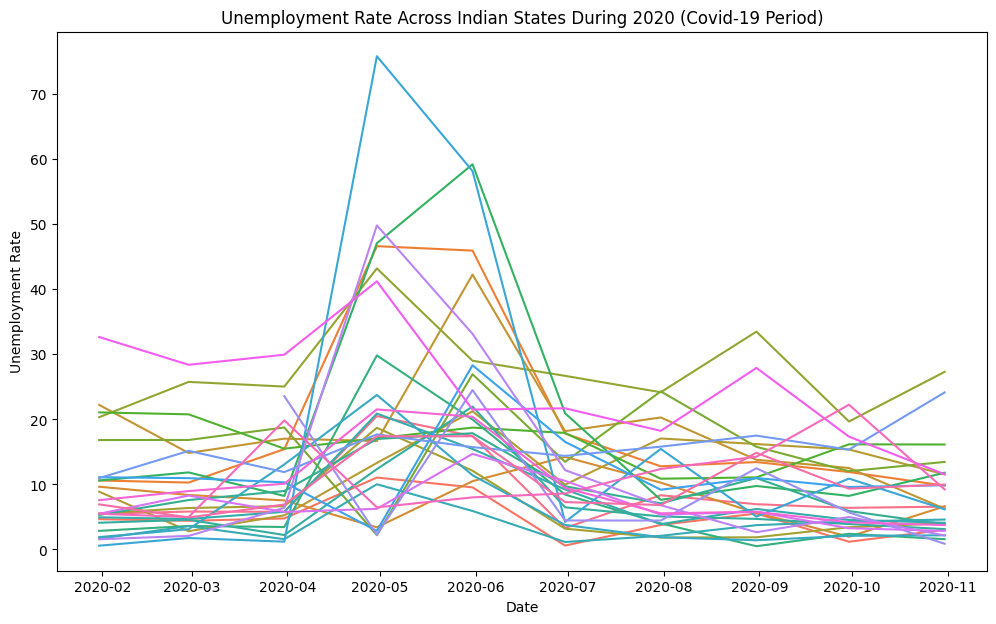

In [16]:
covid_data = data[data['Year'] == 2020]

plt.figure(figsize = (12, 7))
sns.lineplot(data = covid_data, x = 'Date', y = 'Estimated Unemployment Rate', hue = 'State', legend = False)
plt.title('Unemployment Rate Across Indian States During 2020 (Covid-19 Period)')
plt.ylabel('Unemployment Rate')
plt.xlabel('Date')
plt.show()

* **Filter data for 2020** to focus on the Covid-19 period.
* **Plot unemployment trends** for each state throughout 2020.
* This shows how **Covid-19 impacted unemployment** across different regions.

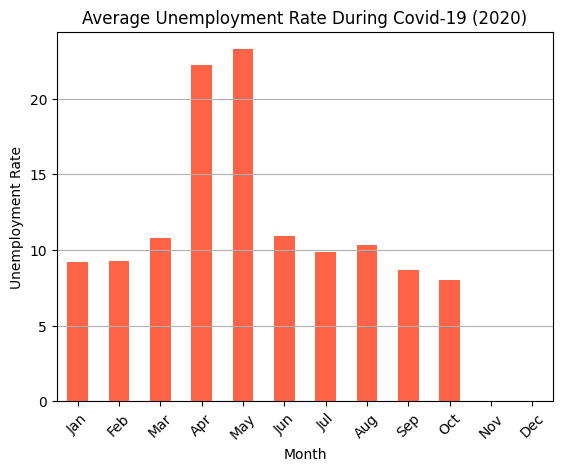

In [17]:
covid_summary = covid_data.groupby('Month')['Estimated Unemployment Rate'].mean().reindex(month_order)
covid_summary.plot(kind = 'bar', color = 'tomato')
plt.title('Average Unemployment Rate During Covid-19 (2020)')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation = 45)
plt.grid(axis='y')
plt.show()

* **Group 2020 data by month** and calculate the average unemployment rate.
* **Create a bar chart** to show how unemployment changed month by month during Covid-19.
* Helps visualize the **monthly impact of the pandemic** on employment.

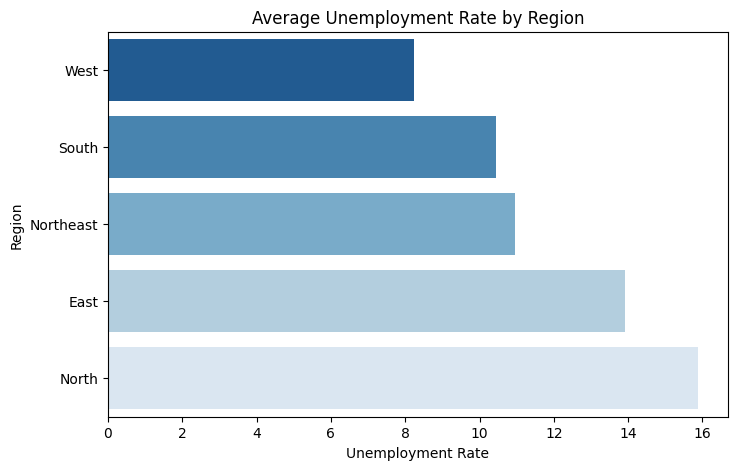

In [19]:
region_avg = data.groupby('Region')['Estimated Unemployment Rate'].mean().sort_values()

plt.figure(figsize = (8, 5))
sns.barplot(x = region_avg.values, y = region_avg.index, palette = 'Blues_r')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Unemployment Rate')
plt.ylabel('Region')
plt.show()

* **Calculate average unemployment rate** for each region.
* **Sort the regions** from lowest to highest unemployment.
* **Plot a horizontal bar chart** to compare unemployment rates across regions visually.

---
Unemployment rate in Norht is pretty bigger than others.

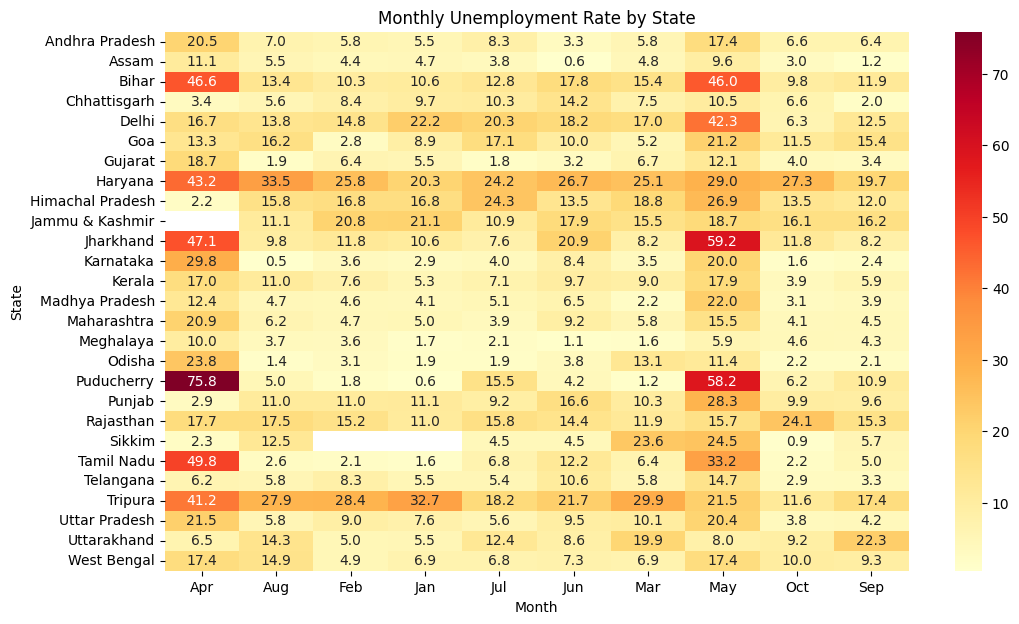

In [27]:
heat_data = data.pivot_table(values = 'Estimated Unemployment Rate', index = 'State', columns = 'Month', aggfunc = 'mean')

plt.figure(figsize = (12, 7))
sns.heatmap(heat_data, annot = True, fmt = '.1f', cmap = 'YlOrRd')
plt.title('Monthly Unemployment Rate by State')
plt.xlabel('Month')
plt.ylabel('State')
plt.show()

* The code creates a table that summarizes the **average unemployment rate for each state across different months**.
* It then draws a **heatmap**, where colors indicate the level of unemployment, warmer colors mean higher rates.
* This visual helps quickly identify **patterns or spikes in unemployment by state and month**.

---

As a result, the warmest color is 75.8 (Puducherry - April), the second one is 59.2 (Jharkhand - May), and the third one is 58.2 (Puducherry - May).

In conclusion, this analysis of unemployment in India during 2019–2020 reveals several key insights:

1. Unemployment spiked significantly during the Covid-19 pandemic, particularly from April to June 2020, reflecting the economic disruptions caused by lockdowns.

2. Regional disparities are evident—states in the northern and western parts of India experienced higher unemployment on average.

3. Seasonal trends were visible, with lower unemployment toward year-end, possibly due to agricultural or festival-season jobs.

4. State-wise heatmaps and regional averages highlighted which areas were most affected, enabling targeted policy formulation.

Overall, the analysis offers valuable insights for policy makers, economists, and labor organizations to design data-driven employment and recovery strategies.

In [28]:
# Finally

***I WOULD LIKE TO EXPRESS MY SINCERE GRATITUDE FOR YOUR TIME AND CONSIDERATION***

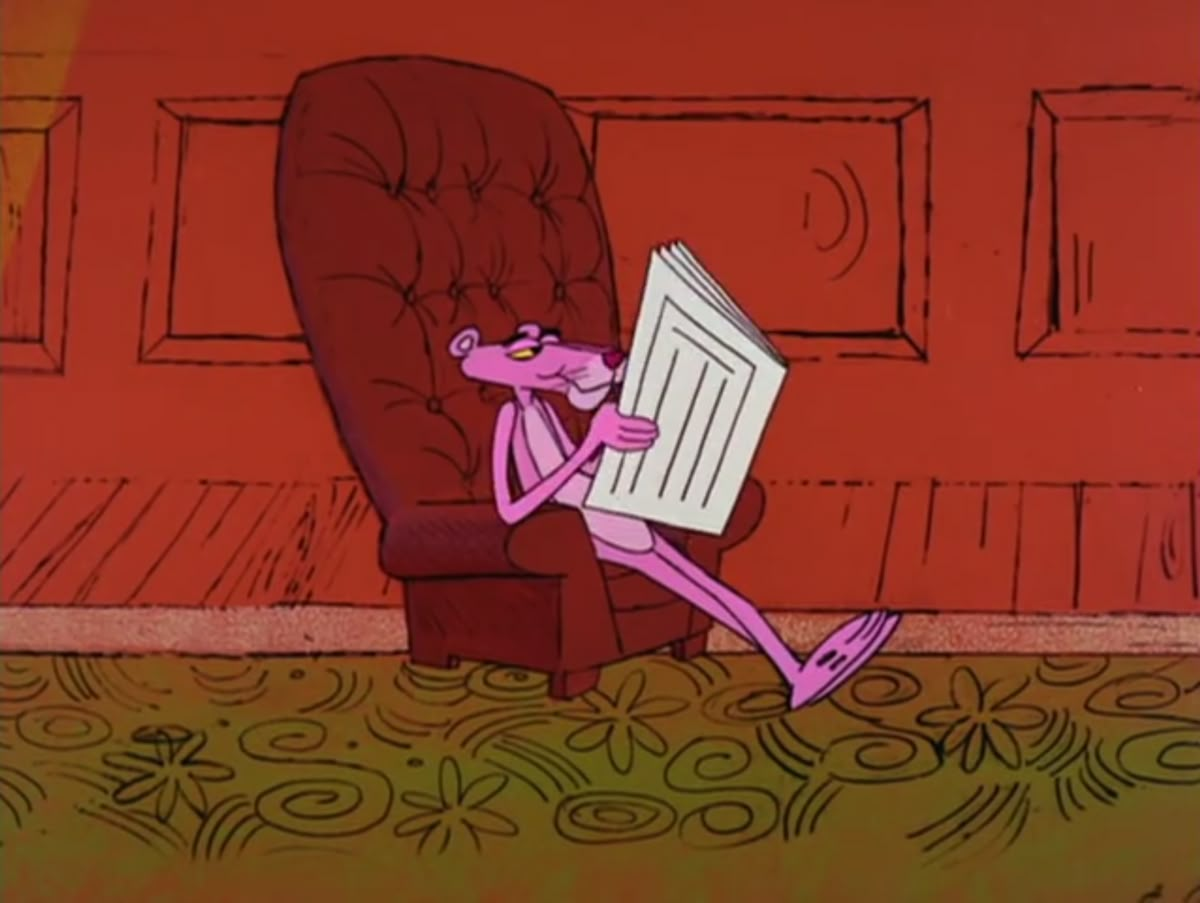